In [2]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [3]:
# shape (50, 2)
data2d = np.loadtxt("./data/data2D.csv", delimiter=',') 
# shape (500, 1000)
data1000d = np.loadtxt("./data/data1000D.csv", delimiter=',') 

In [4]:

def calculate_buggy_pca(X, k):
    dim = X.shape[1]
    u, s, vt = np.linalg.svd(X)
    V = vt[range(k)].reshape((dim, k)) 
    Z = np.matmul(X, V) #matrix multiplication
    re_X = np.matmul(Z, V.T) 
    return V, Z, re_X

In [5]:
def demean_X(X):
    X_d = X.copy()
    mean = np.mean(X_d, axis=0)
    return (X_d - mean), mean

def calculate_demeaned_pca(X, k):
    X_d, mean = demean_X(X)
    V, Z, re_X = calculate_buggy_pca(X_d, k)
    return V, Z, (re_X + mean)

In [6]:
def normalize_X(X):
    X_n = X.copy()
    mu = np.mean(X_n, axis=0)
    sd = np.std(X_n, axis=0)
    return ((X_n - mu) / sd), mu, sd

def calculate_normalized_pca(X, k):
    X_n, mu, sd = normalize_X(X)
    V, Z, re_X = calculate_buggy_pca(X_n, k)
    return V, Z, (re_X * sd) + mu

In [7]:
def plot_2d_pca(X, re_X):
    plt.scatter(X[:, 0], X[:, 1], c="green", marker='o', s=20, label="original")
    plt.scatter(re_X[:, 0], re_X[:, 1], c="violet", marker='*', s=20,label="modified")



In [8]:
def get_reconstruction_error(X, re_X):
    return round((np.linalg.norm(X - re_X)**2) / len(X), 6)

0.886903


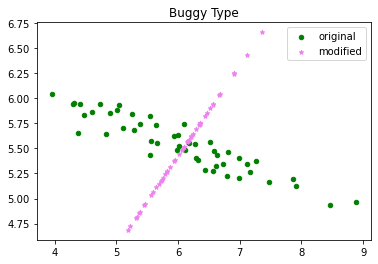

In [9]:
bv, bz, bx = calculate_buggy_pca(data2d, 1)
print(get_reconstruction_error(data2d, bx))
plot_2d_pca(data2d, bx)
plt.title("Buggy Type")
plt.savefig("./buggy_pca.png")
plt.legend()
plt.show()

0.010006


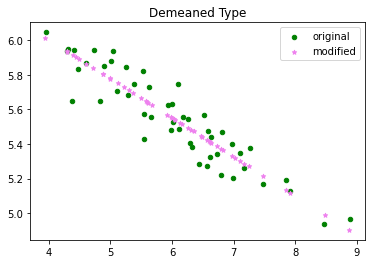

In [10]:
dv, dz, dx = calculate_demeaned_pca(data2d, 1)
print(get_reconstruction_error(data2d, dx))
plot_2d_pca(data2d, dx)
plt.title("Demeaned Type")
plt.savefig("./demeaned_pca.png")
plt.legend()
plt.show()

0.049472


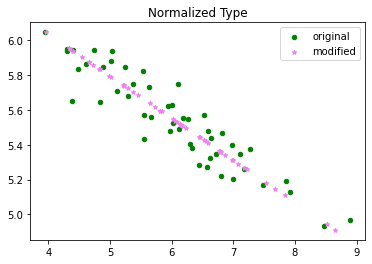

In [11]:
nv, nz, nx = calculate_normalized_pca(data2d, 1)
print(get_reconstruction_error(data2d, nx))
plot_2d_pca(data2d, nx)
plt.title("Normalized Type")
plt.savefig("./normalized_pca.png")
plt.legend()
plt.show()

In [12]:
vals = [100, 200, 300, 400, 500, 600, 700, 800, 900]
buggy_rc_error = []
demeaned_rc_error = []
normalized_rc_error = []
for i in range(len(vals)):
    bv, bz, bx = calculate_buggy_pca(data1000d, vals[i])
    buggy_rc_error.append(get_reconstruction_error(data1000d, bx))
    dv, dz, dx = calculate_demeaned_pca(data1000d, vals[i])
    demeaned_rc_error.append(get_reconstruction_error(data1000d, dx))
    nv, nz, nx = calculate_normalized_pca(data1000d, vals[i])
    normalized_rc_error.append(get_reconstruction_error(data1000d, nx))

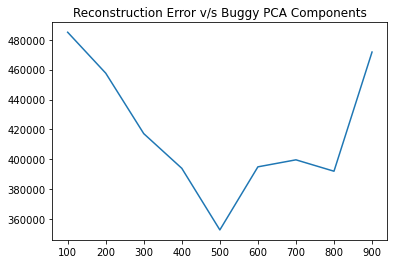

In [13]:
plt.plot(vals, buggy_rc_error)
plt.title("Reconstruction Error v/s Buggy PCA Components")
plt.savefig("./buggy_error_curve.png")
plt.show()


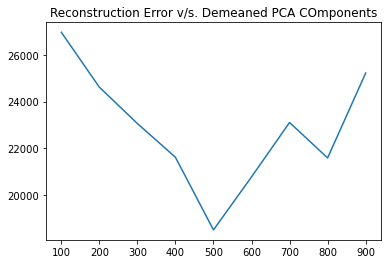

In [14]:
plt.plot(vals, demeaned_rc_error)
plt.title("Reconstruction Error v/s. Demeaned PCA COmponents")
plt.savefig("./demeaned_error_curve.png")
plt.show()

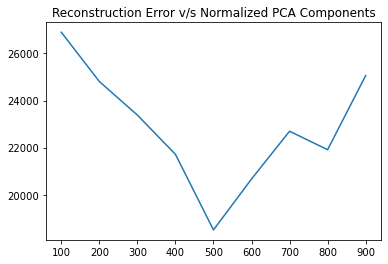

In [15]:
plt.plot(vals, normalized_rc_error)
plt.title("Reconstruction Error v/s Normalized PCA Components")
plt.savefig("./normalized_error_curve.png")
plt.show()


In [16]:

bv, bz, bx = calculate_buggy_pca(data1000d, 500)
print(get_reconstruction_error(data1000d, bx))

dv, dz, dx = calculate_demeaned_pca(data1000d, 500)
print(get_reconstruction_error(data1000d, dx))

nv, nz, nx = calculate_normalized_pca(data1000d, 500)
print(get_reconstruction_error(data1000d, nx))

352741.458071
18508.981365
18503.18559


0.010006
18508.981365


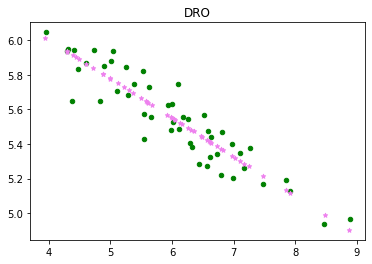

In [17]:
def dro(X, k):
    d = X.shape[1]
    X_dro = X.copy()
    b = np.mean(X_dro, axis=0)
    Q = X_dro - b
    u, s, vt = np.linalg.svd(Q)
    A = vt[range(k)].reshape((d, k))
    Z = np.matmul(Q, A)
    return b, A, Z


b2d, A2d, Z2d = dro(data2d, 1)
X2d = np.matmul(Z2d, A2d.T) + b2d
print(get_reconstruction_error(data2d, X2d))
plot_2d_pca(data2d, X2d)
plt.title("DRO")
plt.savefig("./dro.png")

b1000d, A1000d, Z1000d = dro(data1000d, 500)
X1000d = np.matmul(Z1000d, A1000d.T) + b1000d
print(get_reconstruction_error(data1000d, X1000d))